In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


AIM : to classify fraud and non fraudulent transaction 

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
#importing visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
#Reading the data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


In [148]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [150]:
#checking different descriptive statistics of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [151]:
df.dtypes
# all variables are of float type

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [152]:
df.isnull().sum().max()
#no null values

0

In [153]:
#checking distribution of class
fraud = round(len(df[df['Class']==1])/len(df) *100,2)
nofraud = round(len(df[df['Class']==0])/len(df) *100,2)
print("No fraud transaction is:", str(nofraud)+'%' ,"of the dataset")
print("fraud transaction is:", str(fraud)+'%' ,"of the dataset")

No fraud transaction is: 99.83% of the dataset
fraud transaction is: 0.17% of the dataset


# EDA : **UNIVARIATE ANALYSIS** 

To know more about [univariate analysis](https://towardsdatascience.com/exploring-univariate-data-e7e2dc8fde80)
and further we can get knowledge about [EDA](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14#:~:text=Bivariate%20Analysis%20If%20we%20analyze%20data%20by%20taking,a%20dataset%2C%20it%20is%20known%20as%20Bivariate%20Analysis.)

Text(0.5, 1.0, '0:No Fraud  1:Fraud transaction')

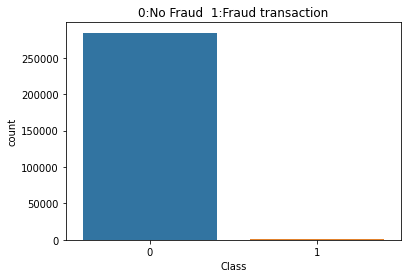

In [154]:
#CLASS VARIABLE
sns.countplot(x='Class',data=df)
plt.title('0:No Fraud  1:Fraud transaction')

THIS TELLS US OUR DATA IS VERY IMBALANCE 99.83% NON FRAUD AND ONLY 0.17 % FRAUD

Text(0.5, 1.0, 'Distribution of amount')

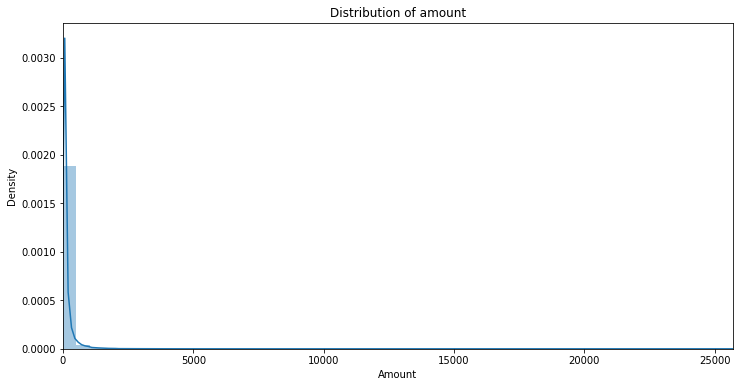

In [155]:
# AMOUNT
amount_val = df['Amount'].values
plt.figure(figsize = (12,6))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val),max(amount_val))
plt.title('Distribution of amount')

MAXIMUM TRANSACTION ARE OF LOW AMOUNT AND HIGH AMOUNT TRANSACTION ARE VERY LESS

Text(0.5, 1.0, 'Distribution of Transaction time')

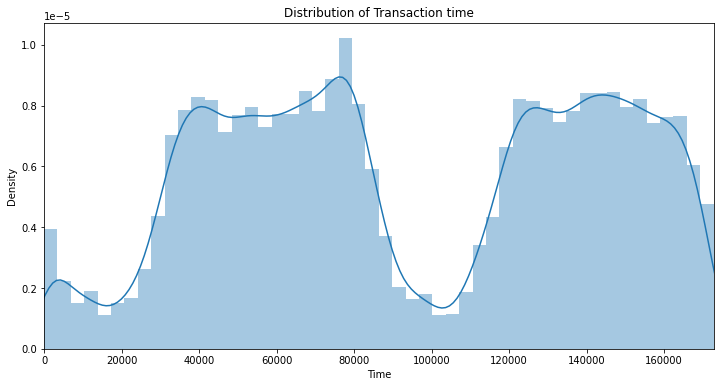

In [156]:
time_val = df['Time'].values
plt.figure(figsize = (12,6))
sns.distplot(df['Time'])
plt.xlim(min(time_val),max(time_val))
plt.title('Distribution of Transaction time')

TIME HAS BIMODAL DISTRIBUTION i.e. AFTER ONE PEAK TRANSACTION COMES DOWN AND AGAIN RISES. (THIS MAY HAPPEN BCOZ OF NIGHT TIME.)

In [157]:
# DISTRIBUTION OF V'S
'''fig, ax = plt.subplots(nrows = 7,ncols = 4,figsize=(16,24))

for i in range(1,29):
    m = (i-1)//4
    n = (i-1)%4
    col = 'V' + str(i)
    ax[m,n].hist(df[col],bins=40)
    ax[m,n].set_title(col)
    ax[m,n].vlines(x = df[col].mean(),ymin =0,ymax = 10**3,linestyle = 'dashed',colors = 'g')
    ax[m,n].set_yscale('log')'''

"fig, ax = plt.subplots(nrows = 7,ncols = 4,figsize=(16,24))\n\nfor i in range(1,29):\n    m = (i-1)//4\n    n = (i-1)%4\n    col = 'V' + str(i)\n    ax[m,n].hist(df[col],bins=40)\n    ax[m,n].set_title(col)\n    ax[m,n].vlines(x = df[col].mean(),ymin =0,ymax = 10**3,linestyle = 'dashed',colors = 'g')\n    ax[m,n].set_yscale('log')"

# BIVARIATE ANALYSIS

In [158]:
df.describe()['Amount']

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Amount vs Class')

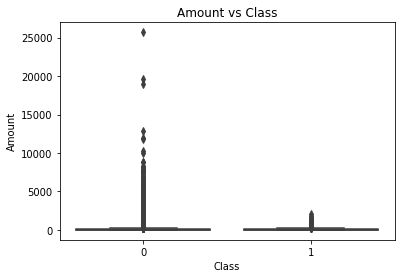

In [159]:
#CLASS VS AMOUNT
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
#There are very less points having Amount > 10,000.
#Therefore these values should be excluded from dataset

In [160]:
#only 7 points
len(df[df['Amount']>2500])

440

In [161]:
(abs(284358-284807)/284807)*100

0.15765061954235676

In [162]:
df = df[df['Amount']<2500]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,...,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.000000,284358.00000
mean,94818.346799,0.011084,0.017745,0.008040,-0.004222,0.011701,-0.006478,-0.012996,0.003106,0.000883,...,-0.001954,0.001923,0.002207,-0.000220,0.000964,0.000278,-0.000508,-0.000004,82.418058,0.00173
std,47490.774352,1.926323,1.558744,1.496450,1.409194,1.304441,1.301794,1.140190,1.186729,1.097736,...,0.725203,0.721829,0.558351,0.605182,0.517105,0.481850,0.391143,0.322417,183.533166,0.04156
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-23.669726,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-36.666000,-2.836627,-7.495741,-2.068561,-22.565679,-11.710896,0.000000,0.00000
25%,54214.250000,-0.916192,-0.594577,-0.883958,-0.849752,-0.687921,-0.768982,-0.554863,-0.207348,-0.642025,...,-0.228456,-0.540953,-0.161303,-0.354602,-0.316351,-0.326725,-0.070625,-0.052949,5.530000,0.00000
50%,84699.000000,0.021166,0.067345,0.182205,-0.021888,-0.052791,-0.275663,0.038845,0.022971,-0.050698,...,-0.029806,0.007669,-0.011000,0.040838,0.017099,-0.051769,0.001445,0.011191,21.990000,0.00000
75%,139328.000000,1.316286,0.804825,1.028387,0.739334,0.612861,0.394708,0.567689,0.328069,0.597572,...,0.185587,0.529166,0.147613,0.439230,0.350791,0.240931,0.091017,0.077886,76.650000,0.00000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,16.614054,21.014587,20.007208,15.594995,...,27.202839,10.503090,22.083545,4.022866,7.519589,3.517346,10.507884,33.847808,2499.900000,1.00000


Text(0.5, 1.0, 'Amount vs Class')

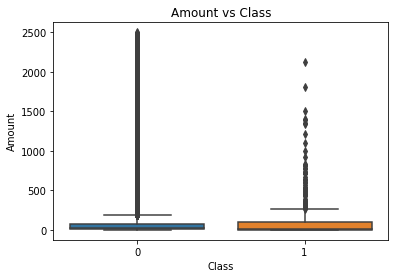

In [163]:
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
# now no transaction of higher amount is detected

In [164]:
len(df[df['Class']==1])
#no fraud data is deleted or affected only non fraud transacton which were of high amount are deleted

492

In [165]:
#Amount and Time Distribution
# during which hour of day or which minute of hour transaction is happening
data_new = df
timedelta = pd.to_timedelta(data_new['Time'], unit='s')
#new variable for further analysis
data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
#new variable for further analysis
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [166]:
data_new['Time_min'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [167]:
data_new['Time_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [168]:
df.groupby(by='Time_min').count()['Class']

Time_min
0     5442
1     5119
2     5440
3     5242
4     5241
5     4897
6     4736
7     4976
8     4876
9     4727
10    4779
11    4707
12    4781
13    4739
14    4680
15    4841
16    4699
17    4723
18    4596
19    4760
20    4762
21    4835
22    4772
23    4685
24    4601
25    4747
26    4625
27    4647
28    4618
29    4695
30    4994
31    5057
32    4494
33    4609
34    4505
35    4678
36    4492
37    4589
38    4658
39    4670
40    4893
41    4630
42    4715
43    4654
44    4630
45    4717
46    4639
47    4454
48    4626
49    4502
50    4736
51    4885
52    4689
53    4572
54    4644
55    4514
56    4587
57    4586
58    4410
59    4541
Name: Class, dtype: int64

In [169]:
df.groupby(by='Time_hour').count()['Class']

Time_hour
0      7689
1      4220
2      3324
3      3491
4      2204
5      2989
6      4097
7      7236
8     10257
9     15796
10    16558
11    16813
12    15394
13    15342
14    16529
15    16430
16    16424
17    16133
18    17020
19    15630
20    16736
21    17695
22    15425
23    10926
Name: Class, dtype: int64

In [170]:
''''ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)'''

'\'ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.5, data=data_new, hue=\'Class\')\nplt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)'

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

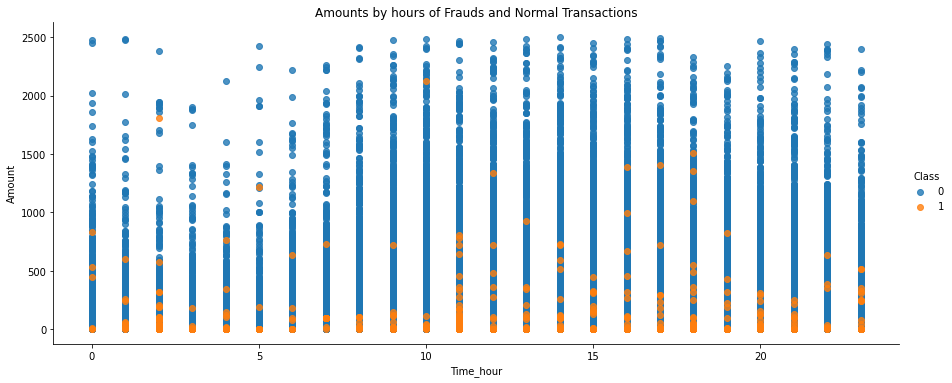

In [171]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)
#plt.savefig('Amount_VS_Time_Scatter.png')

(-1.0, 25.0)

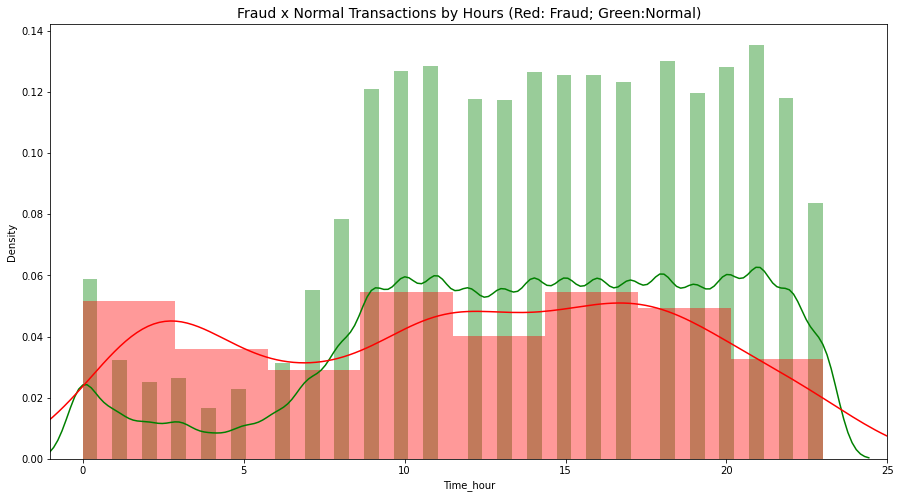

In [172]:
plt.figure(figsize=(15,8))
# Non-Fraudulent Transactions over Time (in hr) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_hour"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transactions by Hours (Red: Fraud; Green:Normal)', fontsize=14)
plt.xlim([-1,25])

In [173]:
''''plt.figure(figsize=(20,6))
# Non-Fraudulent Transactions over Time (in min) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_min"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_min"],
             color='r')
plt.title('Fraud x Normal Transactions by min (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,60])
# in every minute approximate same % of fraud and non fraud transaction happens'''

'\'plt.figure(figsize=(20,6))\n# Non-Fraudulent Transactions over Time (in min) - GREEN\nsns.distplot(data_new[data_new[\'Class\'] == 0]["Time_min"],\n             color=\'g\')\n# Fraudulent Transactions over time (in hr) - RED\nsns.distplot(data_new[data_new[\'Class\'] == 1]["Time_min"],\n             color=\'r\')\nplt.title(\'Fraud x Normal Transactions by min (Red: Fraud; Green:Normal)\', fontsize=12)\nplt.xlim([-1,60])\n# in every minute approximate same % of fraud and non fraud transaction happens'

# SCALING

[Standardiation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) and [Robust scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

In [174]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [175]:
df.drop(['Time_min', 'Time_hour'],axis=1,inplace =True)

In [176]:
#inserting these scaled columns at 0,1
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.794573,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.271372,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.015045,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.427306,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.674916,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [177]:
df.describe()['scaled_amount']

count    284358.000000
mean          0.849663
std           2.580613
min          -0.309196
25%          -0.231440
50%           0.000000
75%           0.768560
max          34.841254
Name: scaled_amount, dtype: float64

# SPLITTING 
splitting the original data for testing as we cannot test on undersample or oversample data that will not give us correct estimate of our model.

In [178]:
from sklearn.model_selection import StratifiedKFold
# getting test data for our model evaluation in future


X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=1234, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.

# Turn into an array
''''original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values'''

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)


print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30402  30433  30456 ... 284355 284356 284357] Test: [    0     1     2 ... 56928 56929 56930]
Train: [     0      1      2 ... 284355 284356 284357] Test: [ 30402  30433  30456 ... 113785 113786 113787]
Train: [     0      1      2 ... 284355 284356 284357] Test: [ 81032  81455  82245 ... 170677 170678 170679]
Train: [     0      1      2 ... 284355 284356 284357] Test: [150419 150425 150426 ... 227507 227508 227509]
Train: [     0      1      2 ... 227507 227508 227509] Test: [212164 212292 212738 ... 284355 284356 284357]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99826803 0.00173197]
[0.9982768 0.0017232]


In [179]:
original_Xtrain.loc[df['Class']==1].shape

(394, 29)

# UNDERSAMPLING

performing random undersampling

In [180]:
df.loc[df['Class'] == 1]
# getting fraud data

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.309196,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,7.128937,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,3.064398,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.520388,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.295135,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,5.174494,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
280143,-0.298510,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
280149,0.785996,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
281144,3.135686,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


In [181]:
# Since our classes are highly skewed we should make them equivalent in order to have a equal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
129325,-0.281355,-0.129863,0.913367,1.524009,0.801882,0.126366,0.150362,0.340343,0.110151,-1.065146,...,0.191064,-0.033967,-0.015427,0.089498,0.048738,-0.937677,0.249071,0.177736,0.160321,0
45203,-0.295135,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1
242387,-0.281074,2.102433,0.321727,-2.013622,1.094215,1.158014,-0.295342,0.653726,-0.352412,0.035868,...,-0.176028,0.009066,0.300220,-0.063476,0.065290,0.618782,-0.483672,-0.010579,-0.060414,0
238366,-0.281074,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,...,0.369663,0.397058,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,1
68522,-0.298510,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,...,0.351484,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


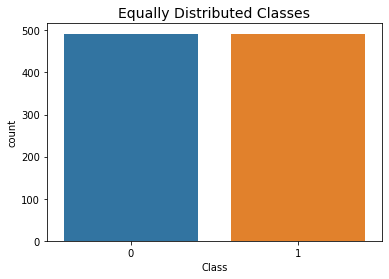

In [182]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# CORRELATION

Text(0.5, 1.0, 'Balanced Data Correlation Matrix \n (use for reference)')

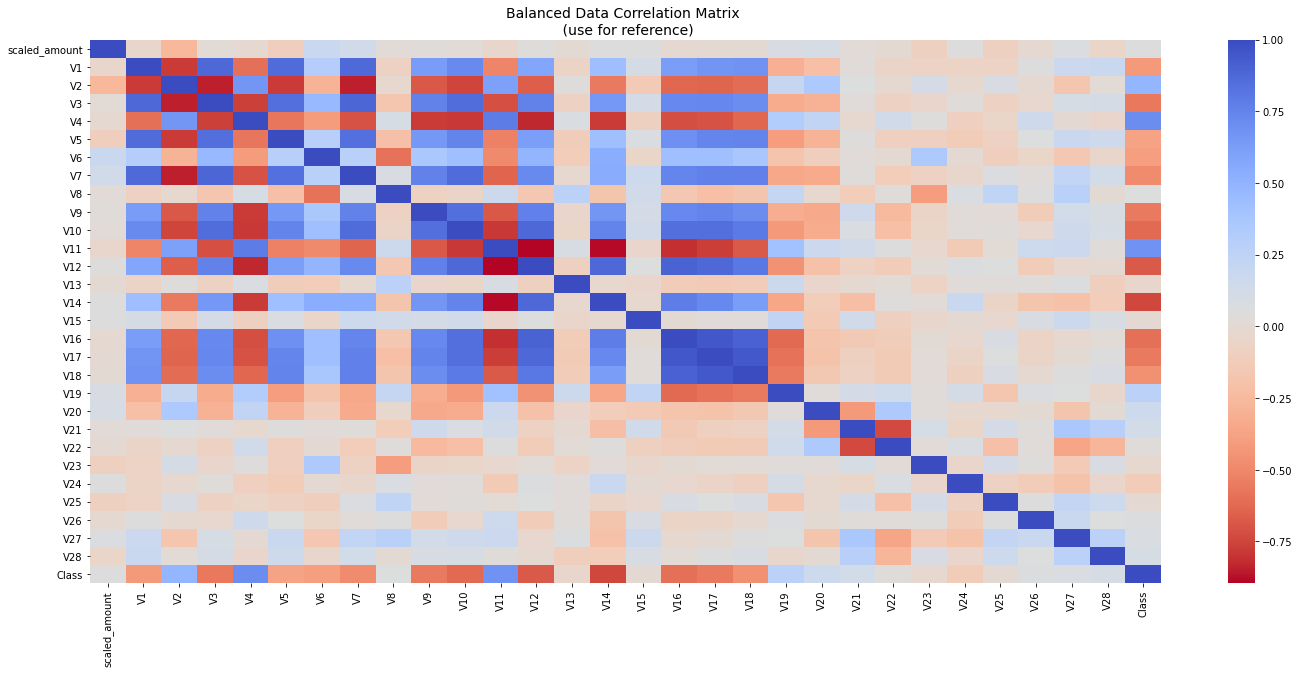

In [183]:
f, ax = plt.subplots(1, 1, figsize=(24,10))

# comparing correlation between dataset
# Entire DataFrame
''''corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n", fontsize=14)'''

# new_df
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('Balanced Data Correlation Matrix \n (use for reference)', fontsize=14)

# DETECTING OUTLIER

In [184]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class<-0.6]['Class']

V10   -0.625129
V12   -0.678071
V14   -0.745829
Name: Class, dtype: float64

In [185]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class>0.5]['Class']

V4       0.704059
V11      0.682985
Class    1.000000
Name: Class, dtype: float64

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

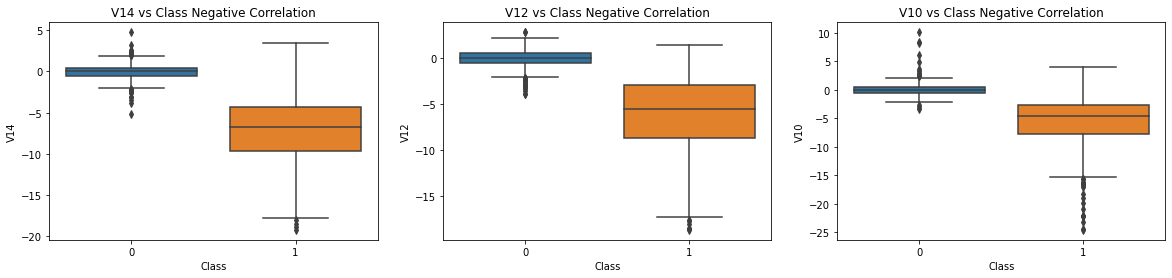

In [186]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df,  ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')


Text(0.5, 1.0, 'V4 vs Class Positive Correlation')

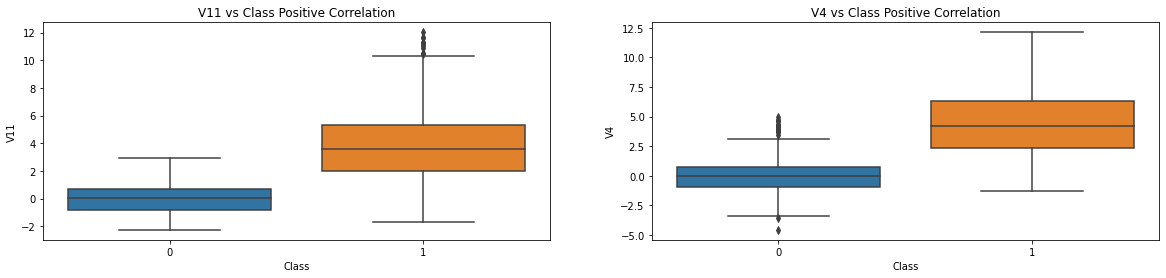

In [187]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df,  ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

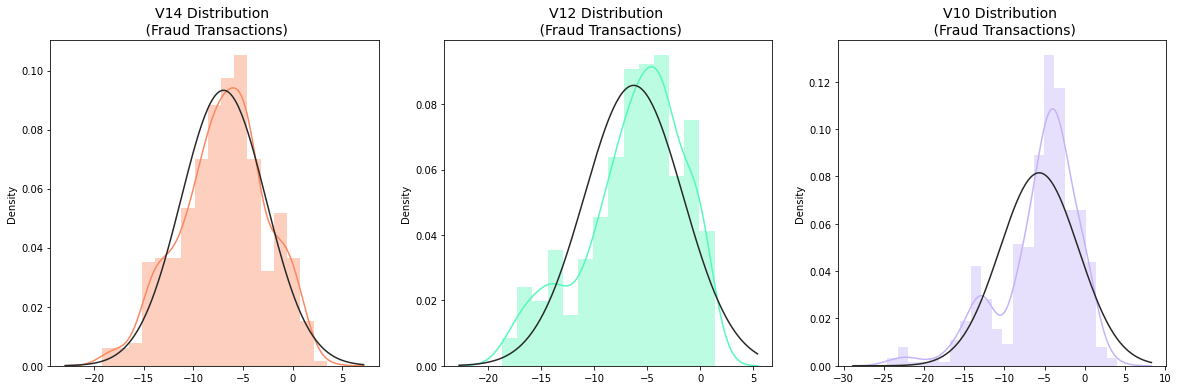

In [188]:
# visualization of features from which we are gonna eliminate outliers
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

In [189]:

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.0499976898594, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.6837146333443, -18.4311310279993, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-22.1870885620007, -24.403184

Text(0, -12, 'Fewer extreme \n outliers')

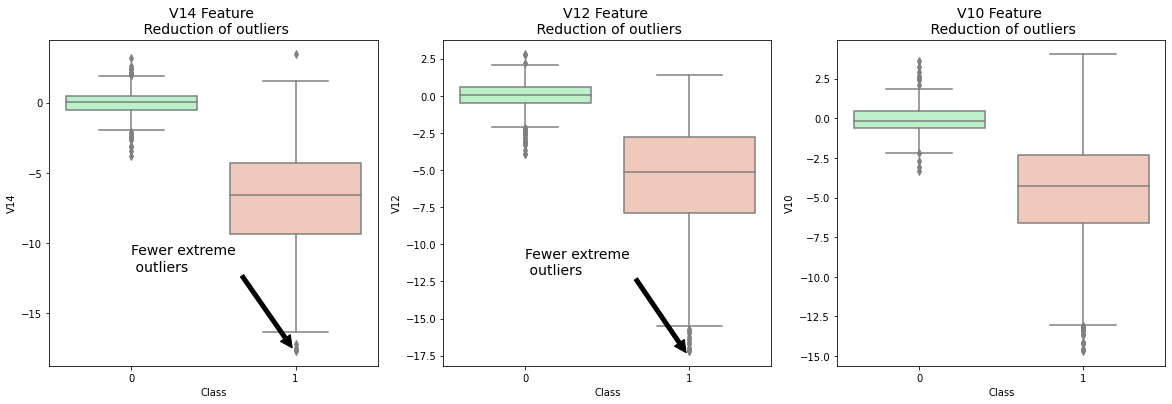

In [190]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# TSNE and PCA :DIMENSIONAITY REDUCTION VISUALIZATION

In [191]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import time
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']
# WE ARE MAPPING OUR DATA FROM HIGH DIMENSIONS TO LOW DIMENSION

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42,perplexity =30).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

T-SNE took 4.3 s
PCA took 0.015 s


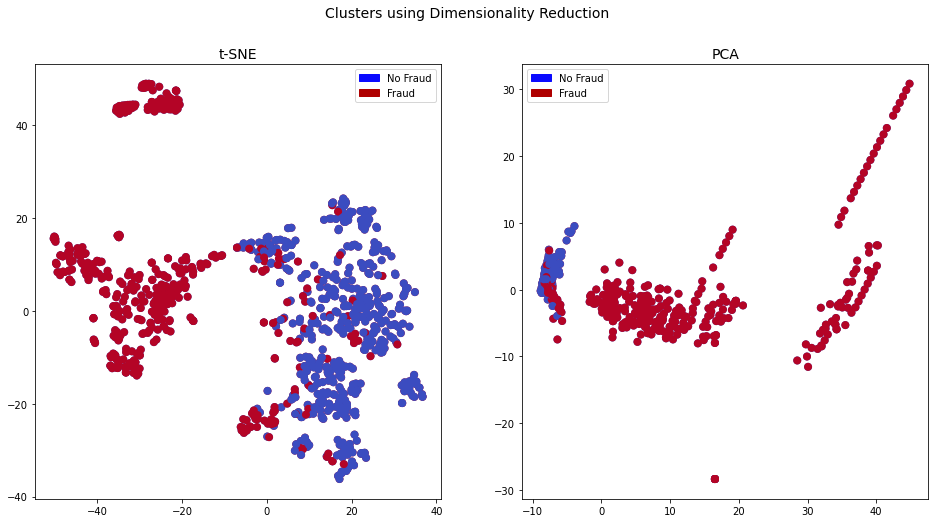

In [192]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)


ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.legend(handles=[blue_patch, red_patch])

**This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.**


# IMPLEMENTING MODEL

In [193]:

X = new_df.drop('Class', axis=1)
y = new_df['Class']

# SPLITTING IN TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# CONVERTIG THESE INTO ARRAYS
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [195]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)
X.columns

X_shapes:
 X_train: X_test:
 (754, 29) (189, 29) 

Y_shapes:
 Y_train: Y_test:
 (754,) (189,)


Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [196]:
#IMPORTING 6 MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [197]:
# CREATING OBJECT
Models = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XgBoost" : xgb.XGBClassifier(eval_metric='logloss')
}

In [198]:
from sklearn.model_selection import cross_val_score


for key, classifier in Models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 93.0 % accuracy score


# GRID SEARCH

In [199]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
'''Steps:
    1. creating dict of parameters we are going to check
    2. applying grid search cv on our model and get model with best parameters
    3. Fit this new Model with X_train,y_train
    
'''
t0=time.time()
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
# Random Forest Classifier
rfc_params = {"n_estimators" :[100,150,200,250,300],
             "min_samples_split" : [2,5,10],
             "max_features": ['auto', 'sqrt', 'log2', 'None']}
grid_rfc = GridSearchCV(RandomForestClassifier(),rfc_params)
grid_rfc.fit(X_train,y_train)

rfc = grid_rfc.best_estimator_
# the n_estimator parameter controls the number of trees inside the classifier.

# XGBoost
xg_param = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
grid_xg = GridSearchCV(xgb.XGBClassifier(eval_metric = 'logloss'),xg_param)
grid_xg.fit(X_train,y_train)
xg = grid_xg.best_estimator_
t1= time.time()
print(t1-t0)

351.6685574054718


In [200]:
print(log_reg,'\n', knears_neighbors,'\n' ,svc,'\n', tree_clf,'\n' ,rfc,'\n',xg)

LogisticRegression(C=0.1) 
 KNeighborsClassifier(n_neighbors=2) 
 SVC(C=0.7, kernel='linear') 
 DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5) 
 RandomForestClassifier(min_samples_split=5, n_estimators=200) 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0.25, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=3, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [201]:


log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

rfc_score = cross_val_score(rfc, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score', round(rfc_score.mean() * 100, 2).astype(str) + '%')

xg_score = cross_val_score(xg, X_train, y_train, cv=5)
print('Xg Boost Cross Validation Score', round(xg_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.1%
Knears Neighbors Cross Validation Score 92.44%
Support Vector Classifier Cross Validation Score 93.5%
DecisionTree Classifier Cross Validation Score 90.85%
Random Forest Classifier Cross Validation Score 92.84%
Xg Boost Cross Validation Score 93.64%


In [202]:
#gettig predictions from models
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = log_reg.predict(X_test)

knears_pred = knears_neighbors.predict(X_test)

svc_pred = svc.predict(X_test)

tree_pred = tree_clf.predict(X_test)

rfc_pred = rfc.predict(X_test)

xg_pred = xg.predict(X_test)

In [203]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred))
print('Random Classifier: ', roc_auc_score(y_test, rfc_pred))
print('XG Boost Classifier: ', roc_auc_score(y_test, xg_pred))

Logistic Regression:  0.936562150055991
KNears Neighbors:  0.9472564389697647
Support Vector Classifier:  0.9206606942889136
Decision Tree Classifier:  0.9472564389697647
Random Classifier:  0.9472004479283315
XG Boost Classifier:  0.9523516237402015


In [204]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, rfc_pred)
xg_fpr, xg_tpr, xg_threshold = roc_curve(y_test, xg_pred)

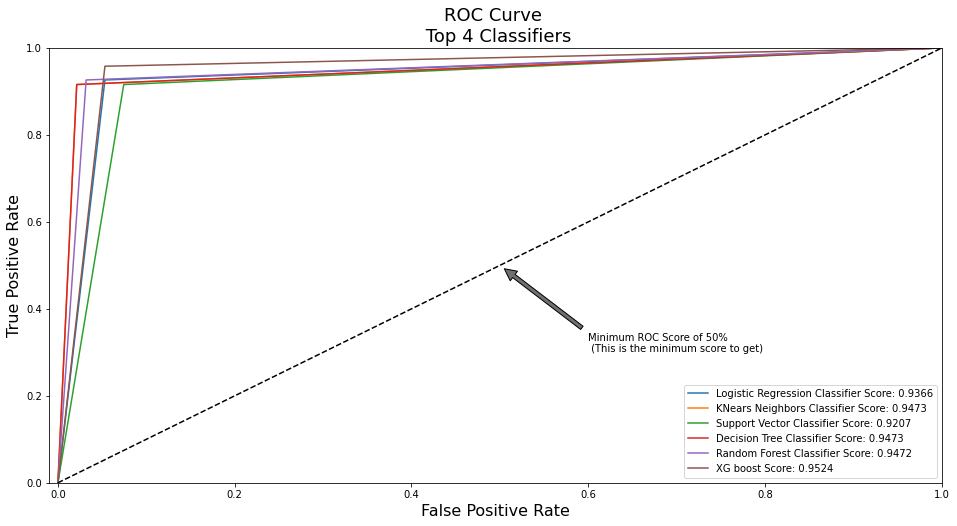

In [205]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rfc_pred)))
plt.plot(xg_fpr, xg_tpr, label='XG boost Score: {:.4f}'.format(roc_auc_score(y_test, xg_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

Logistic Regression is best model till now testing it on original test data

# Confussion Matrix

[Text(0, 0.5, ''), Text(0, 1.5, '')]

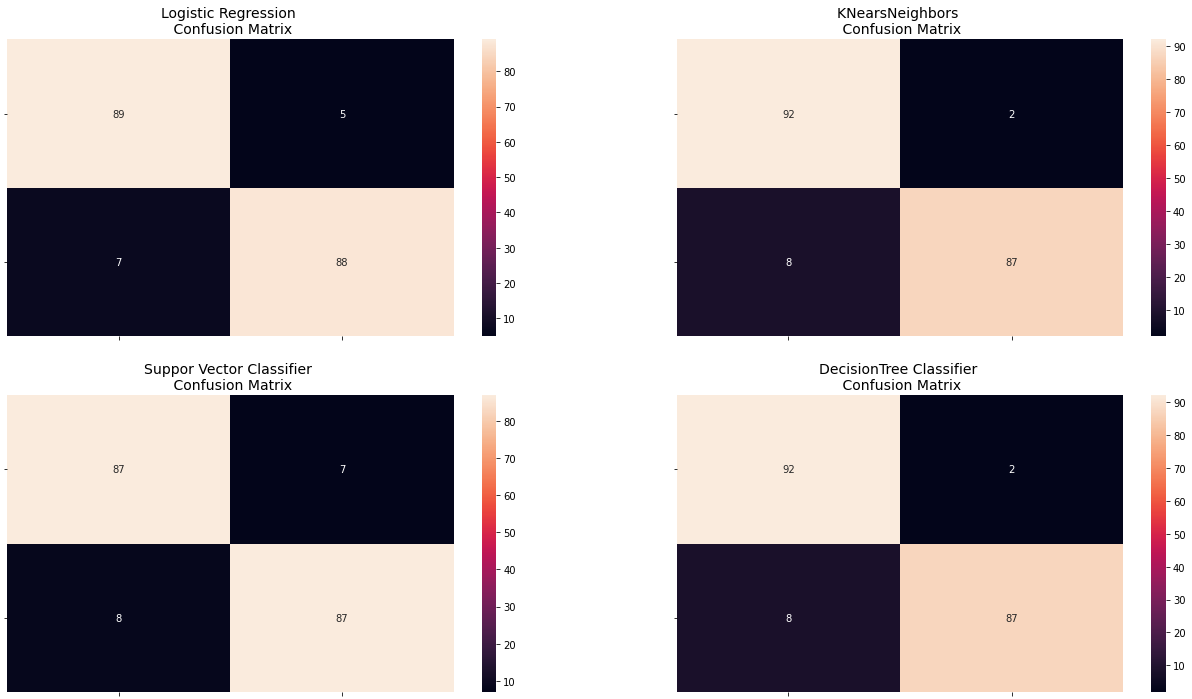

In [206]:

from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_xg = xg.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [207]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rfc))

print('XG Boost:')
print(classification_report(y_test, y_pred_xg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        94
           1       0.95      0.93      0.94        95

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        94
           1       0.98      0.92      0.95        95

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.93      0.92      0.92        95

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted

 # [AUPRC](https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/#:~:text=The%20area%20under%20the%20precision-recall%20curve%20%28AUPRC%29%20is,care%20a%20lot%20about%20finding%20the%20positive%20examples.) and [one more article on auprc](https://www.listendata.com/2019/07/precision-recall-curve-simplified.html|)

In [208]:
import sklearn.metrics
lr_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_log_reg)
lr_auprc

0.9135509023454695

In [209]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

<Figure size 864x432 with 0 Axes>

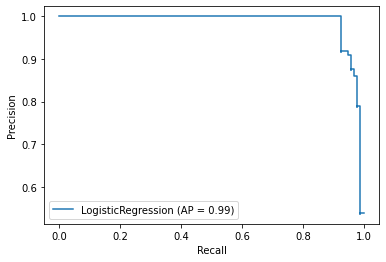

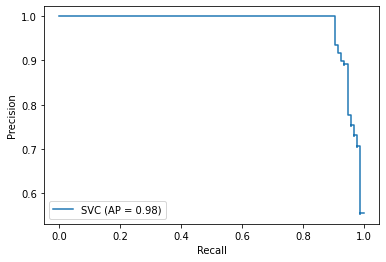

In [210]:
plt.figure(figsize=(12,6))
plot_precision_recall_curve(log_reg, X_test, y_test)
#log_reg_pr.ax_.set_title('2-class Precision-Recall curve: '
                   #'AP={0:0.2f}'.format(lr_auprc))
svc_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_svc)
plot_precision_recall_curve(svc, X_test, y_test)

# Testing on Test data

In [211]:
org_log_reg_pred = log_reg.predict(original_Xtest)

org_knears_pred = knears_neighbors.predict(original_Xtest)

org_svc_pred = svc.predict(original_Xtest)

org_tree_pred = tree_clf.predict(original_Xtest)

org_rfc_pred = rfc.predict(original_Xtest)

org_xg_pred = xg.predict(original_Xtest)

In [212]:
org_log_reg_cf = confusion_matrix(original_ytest, org_log_reg_pred)
org_kneighbors_cf = confusion_matrix(original_ytest, org_knears_pred)
org_svc_cf = confusion_matrix(original_ytest, org_svc_pred)
org_tree_cf = confusion_matrix(original_ytest,org_tree_pred)
org_rfc_cf = confusion_matrix(original_ytest, org_rfc_pred)
org_xg_cf = confusion_matrix(original_ytest,org_xg_pred)

print(org_log_reg_cf, '\n', org_kneighbors_cf, '\n', org_svc_cf, '\n', org_tree_cf , '\n', org_rfc_cf, '\n', org_xg_cf)

[[55170  1603]
 [   10    88]] 
 [[55845   928]
 [    9    89]] 
 [[54379  2394]
 [    8    90]] 
 [[53767  3006]
 [   13    85]] 
 [[55180  1593]
 [    0    98]] 
 [[54717  2056]
 [    0    98]]


In [213]:
print('Logistic Regression:')
print(classification_report(original_ytest, org_log_reg_pred))

print('KNears Neighbors:')
print(classification_report(original_ytest, org_knears_pred))

print('Support Vector Classifier:')
print(classification_report(original_ytest, org_svc_pred))

print('Tree Classifier:')
print(classification_report(original_ytest, org_tree_pred))

print('Random Forest Classifier:')
print(classification_report(original_ytest, org_rfc_pred))

print('XG:')
print(classification_report(original_ytest, org_xg_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56773
           1       0.05      0.90      0.10        98

    accuracy                           0.97     56871
   macro avg       0.53      0.93      0.54     56871
weighted avg       1.00      0.97      0.98     56871

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56773
           1       0.09      0.91      0.16        98

    accuracy                           0.98     56871
   macro avg       0.54      0.95      0.58     56871
weighted avg       1.00      0.98      0.99     56871

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56773
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56871
   macro avg       0.52      0.94      0.52     56871
weighted

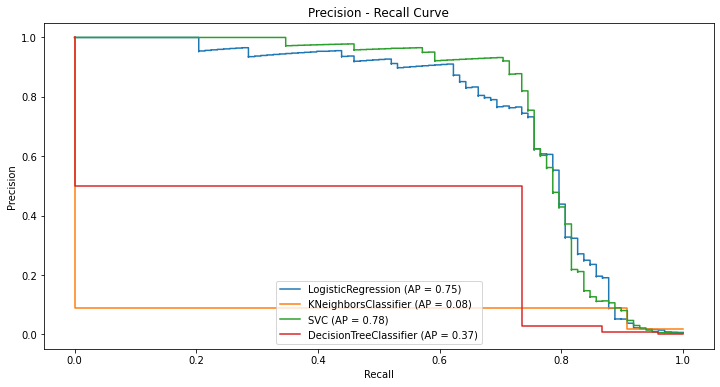

In [214]:
fig, ax = plt.subplots(1, 1,figsize=(12,6))
plot_precision_recall_curve(log_reg, original_Xtest, original_ytest,ax=ax)
plot_precision_recall_curve(knears_neighbors, original_Xtest, original_ytest,ax=ax)
plot_precision_recall_curve(svc, original_Xtest, original_ytest,ax=ax)
plot_precision_recall_curve(tree_clf, original_Xtest, original_ytest,ax=ax)
ax.set_title('Precision - Recall Curve')
plt.legend()

In [215]:
org_lr_auprc = sklearn.metrics.average_precision_score(original_ytest,org_log_reg_pred)

In [216]:
org_lr_auprc

0.04690582362884657

# OVER SAMPLING BY SMOTE

In [217]:
from imblearn.over_sampling import SMOTE


In [218]:
os = SMOTE(random_state = 1234)
X = df.drop('Class', axis=1)
y = df['Class']
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(X, y):
    #print("Train:", train_index, "Test:", test_index)
    o_Xtrai, o_Xtest = X.iloc[train_index], X.iloc[test_index]
    o_ytrai, o_ytest = y.iloc[train_index], y.iloc[test_index]
print('Length of training data : ',+ len(o_ytrai))
print('Length of test data : ',+ len(o_ytest))
columns = o_Xtest.columns
columns

Length of training data :  227487
Length of test data :  56871


Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [219]:
os_data_X,os_data_y=os.fit_resample(o_Xtrai,o_ytrai)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
print('Length of original training data : ',+ len(o_ytrai))
#print(227840*2)
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

Length of original training data :  227487
length of oversampled data is  454186
Number of normal transcation in oversampled data 227093
No.of fraud transcation 227093
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [220]:
o_Xtest.shape

(56871, 29)

In [221]:
columns

Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [222]:
lr = LogisticRegression()
lr.fit(os_data_X,os_data_y)
pred = lr.predict(o_Xtest)
print(classification_report(o_ytest,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56773
           1       0.06      0.94      0.11        98

    accuracy                           0.97     56871
   macro avg       0.53      0.96      0.55     56871
weighted avg       1.00      0.97      0.98     56871



In [223]:
print(confusion_matrix(o_ytest,pred))

[[55219  1554]
 [    6    92]]


In [224]:
xgo = xgb.XGBClassifier(eval_metric = 'logloss')
xgo.fit(os_data_X,os_data_y)
pred_xg = xgo.predict(o_Xtest)
print(classification_report(o_ytest,pred_xg))
print(confusion_matrix(o_ytest,pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56773
           1       0.84      0.89      0.86        98

    accuracy                           1.00     56871
   macro avg       0.92      0.94      0.93     56871
weighted avg       1.00      1.00      1.00     56871

[[56756    17]
 [   11    87]]


In [ ]:
xg_param = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
grid_xg = GridSearchCV(xgb.XGBClassifier(eval_metric = 'logloss'),xg_param)
grid_xg.fit(os_data_X,os_data_y)
xg = grid_xg.best_estimator_